### This Jupyter Notebook is owned by Vince Vertulfo and Daryl Tang

In [19]:
# Blue -info
# Yellow - warning
# Red - danger
# Green - success

<div class="alert alert-block alert-info">
<b>Importing Necessary Libraries:</b> 
</div>

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import seaborn as sns

import squarify #for visualizing treemap layout
from sklearn.cluster import KMeans

<div class="alert alert-block alert-info">
<b>Loading Data:</b> 
</div>

In [36]:
df = pd.read_excel("dataset/Online Retail.xlsx")

In [37]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

<div class="alert alert-block alert-info">
<b>Data Cleaning and Exploration:</b> 
</div>

In [27]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 541909 rows and 8 columns


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 33.1+ MB


In [40]:
df['CustomerID'] = df['CustomerID'].apply(lambda x: "{:.0f}".format(x) if not pd.isnull(x) else x)

In [43]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [45]:
df.describe(include='all')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909,541909.000000
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38,NaN
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom,NaN
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478,NaN
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN,17.987795
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN,378.810824
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN,-168469.600000
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN,3.400000


<div class="alert alert-block alert-warning">
<b>Missing Data:</b> There are 135080 rows that don't have CustomerID
</div>

In [46]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalPrice          0
dtype: int64

In [69]:
# Dropping the rows with NaN
df.dropna(inplace=True)

In [48]:
print(f"Updated: Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Updated: Dataset has 406829 rows and 9 columns


<div class="alert alert-block alert-info">
<b>Recency-Frequency-Monetary Analysis:</b> 
</div>

In [59]:
# Extracting the date you want to reference from for recency
checker_date = df['InvoiceDate'].max() + timedelta(days=1)

In [72]:
# Grouping data by CustomerID
grouped_df = df.groupby('CustomerID').agg(
    {
        'InvoiceDate': lambda x: (checker_date - x.max()).days,
        'InvoiceNo': 'count',
        'TotalPrice' : 'sum'
    }).rename(columns={
        'InvoiceDate': 'Recency',
        'InvoiceNo' : 'Frequency',
        'TotalPrice' : 'Monetary'
    })

In [73]:
# Now, we have our dataset grouped by CustomerID
grouped_df

,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,2,0.00
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,13,176.60


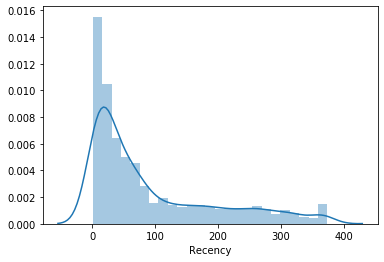

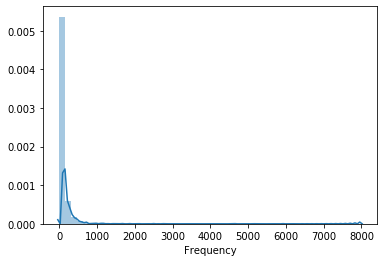

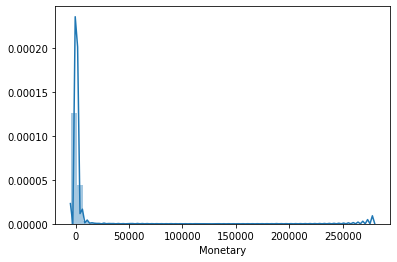

In [79]:
# Let's try exploring the distribution of the data
sns.distplot(grouped_df['Recency'])
plt.show()
sns.distplot(grouped_df['Frequency'])
plt.show()
sns.distplot(grouped_df['Monetary'])
plt.show()

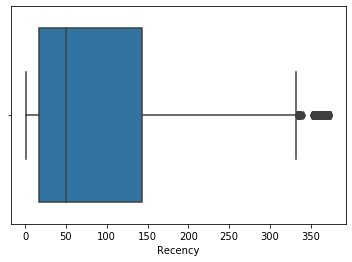

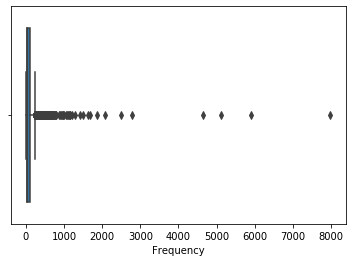

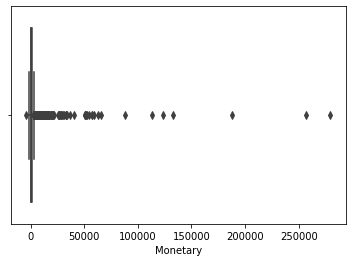

In [81]:
# Let's try exploring the distribution of the data
sns.boxplot(x=grouped_df['Recency'])
plt.show()
sns.boxplot(x=grouped_df['Frequency'])
plt.show()
sns.boxplot(x=grouped_df['Monetary'])
plt.show()